In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
app_df = pd.read_csv('application_data.csv')
prev_df = pd.read_csv('previous_application.csv')

In [4]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
app_df.shape


(307511, 122)

In [9]:
prev_df.shape

(1670214, 37)

# Data Cleaning

In [10]:
def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [11]:
def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [12]:
app_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [13]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (app_df.columns[(round(100*(app_df.isnull().sum()/len(app_df.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [14]:
# Delete the columns having more than 30% missing values
app_df = app_df.drop(cols_30_percent_missing_values,axis=1)

In [15]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [16]:
app_df.shape

(307511, 72)

#### Irrelavant columns to delete from the table

In [17]:
cols_irrelevant = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
cols_irrelevant

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [18]:
app_df = app_df.drop(cols_irrelevant,axis=1)

In [19]:
app_df.shape

(307511, 53)

In [20]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCU

In [21]:
# Percent of missing values in columns
(round(100*(app_df.isnull().sum()/len(app_df.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
F

In [22]:
# Count the rows for which EXT_SOURCE_2 and EXT_SOURCE_3 both are empty
len(app_df[np.isnan(app_df['EXT_SOURCE_2']) & np.isnan(app_df['EXT_SOURCE_3'])])

230

In [23]:
app_df = app_df[(~(np.isnan(app_df['EXT_SOURCE_2']) & np.isnan(app_df['EXT_SOURCE_3'])))]


In [24]:
app_df.loc[np.isnan(app_df['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = app_df['EXT_SOURCE_2'].mean()
app_df.loc[np.isnan(app_df['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = app_df['EXT_SOURCE_3'].mean()

In [25]:
(round(100*(app_df.isnull().sum()/len(app_df.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
F

In [26]:
app_df = app_df[~np.isnan(app_df['AMT_GOODS_PRICE'])]


In [27]:
# converting AMT_REQ_CREDIT_BUREAU_QRT to type 'category'
app_df['AMT_REQ_CREDIT_BUREAU_QRT'] = app_df['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

# displaying frequencies of each category
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215133
1.0       33836
2.0       14393
3.0        1716
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [28]:
app_df.loc[pd.isnull(app_df['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0

In [29]:
app_df = app_df.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)


In [30]:
(round(100*(app_df.isnull().sum()/len(app_df.index)),2))

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3     

In [31]:
app_df.shape

(307004, 48)

In [32]:
(100 - 100*(len(app_df.index)/307511))

0.16487215091493113

We have lost just 0.16% rows in the whole data cleaning process.

In [33]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0.0


In [34]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
app_df['AGE'] = abs(app_df['DAYS_BIRTH']//365)

# Drop 'DAYS_BIRTH' column
app_df = app_df.drop(['DAYS_BIRTH'],axis=1)

In [35]:
# Divide 'DAYS_EMPLOYED' by 365 for YEAR_EMPLOYED
app_df['YEARS_EMPLOYED'] = abs(app_df['DAYS_EMPLOYED']//365)

# Drop 'DAYS_EMPLOYED' column
app_df = app_df.drop(['DAYS_EMPLOYED'],axis=1)

In [36]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0.0,46,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0.0,53,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0.0,53,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0.0,55,9


### Removing outliers

In [37]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for col in col_list_outlier: 
    q1 = app_df[col].quantile(0.25)
    q3 = app_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    app_df = app_df.loc[(app_df[col] > range_low) & (app_df[col] < range_high)]

app_df.shape

(275984, 48)

In [38]:
(100 - 100*(len(app_df.index)/307511))

10.252316177307478

And finally we lost around 10% of rows after removing outliers.

## To check Data Imbalance

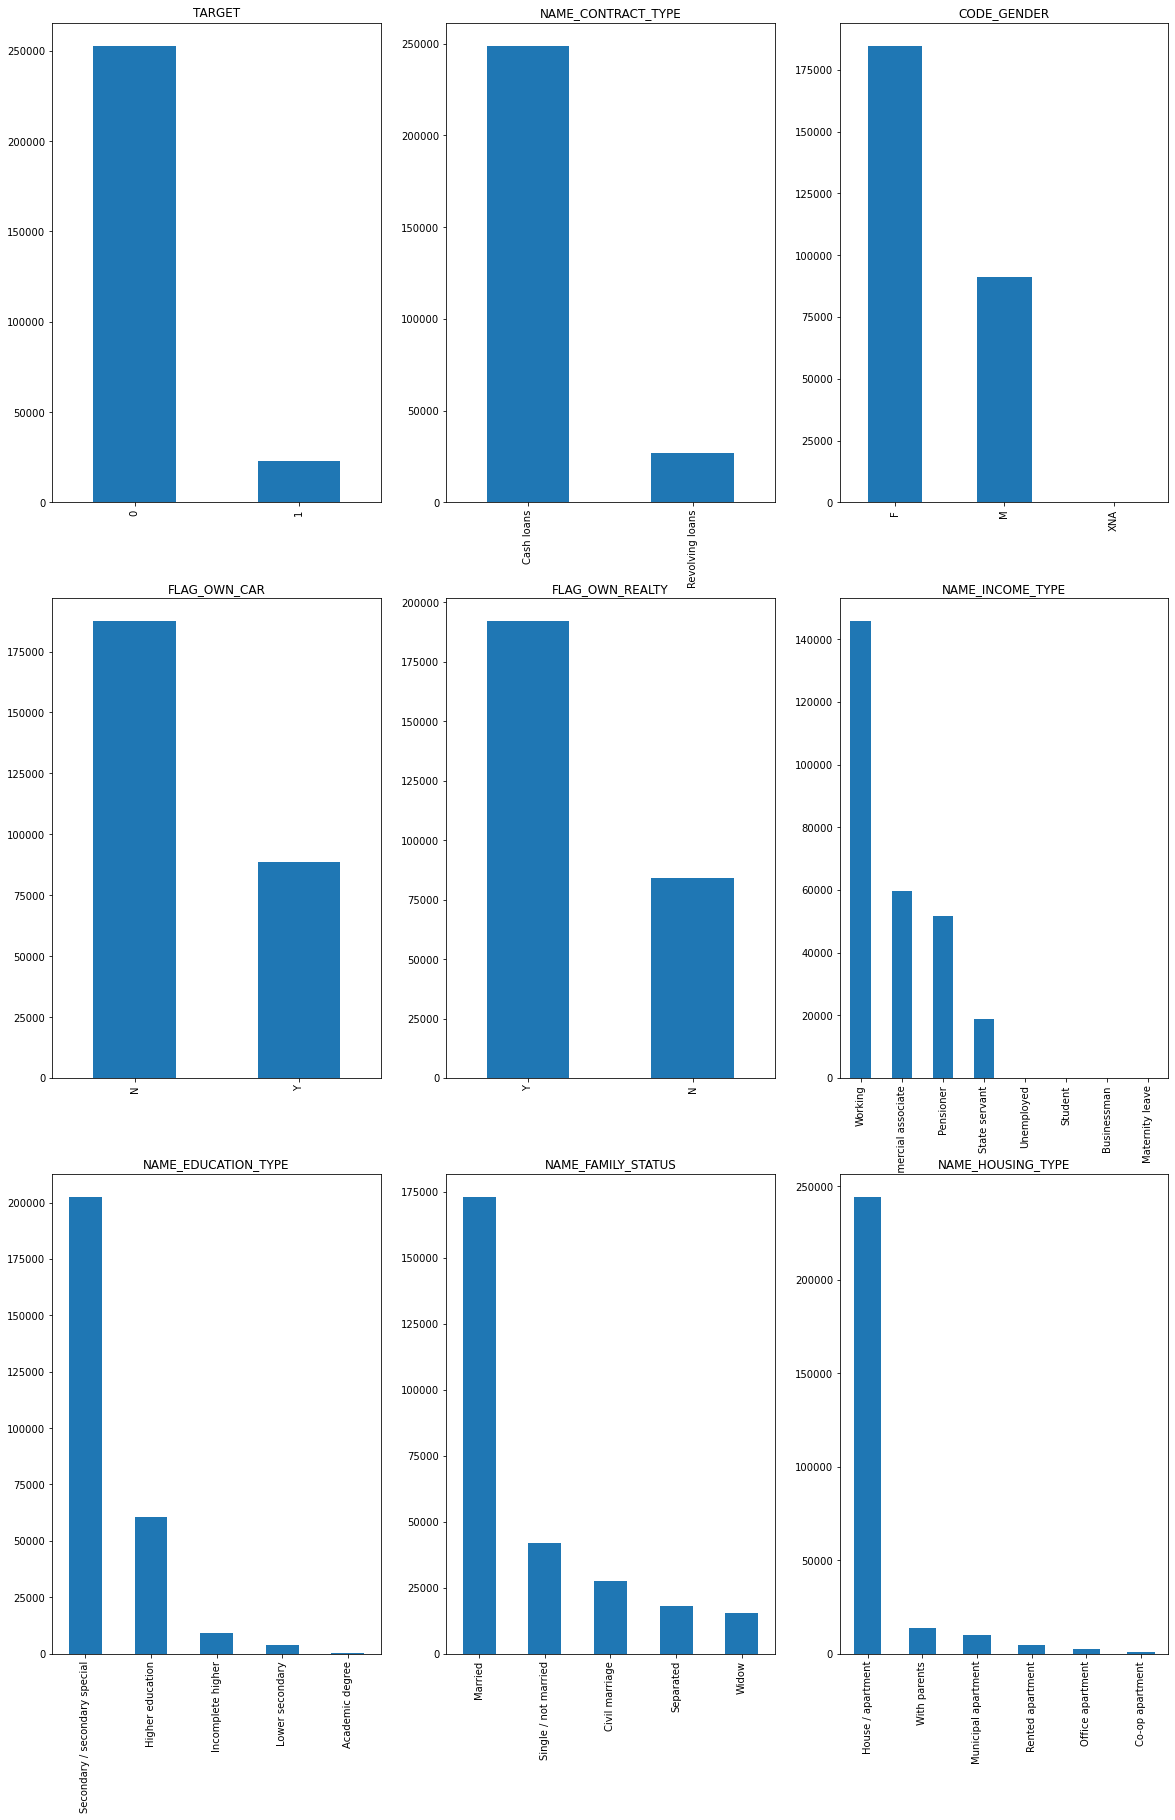

In [39]:
# Listing columns for checking data imbalance and plotting them
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(20,30))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    app_df[col].value_counts().plot(kind='bar');
    plt.title(col)

We can see that there is data imbalance in below columns:-

TARGET - There are very few defaulters(1) compare to non defaulters(0)
NAME_CONTRACT_TYPE - There are very few Revolving loans than Cash loans
NAME_EDUCATION_TYPE - Most of the loans applied by Secondary/Secondary special educated people
NAME_FAMILY_STATUS - Most of the loans applied by Married people.
NAME_HOUSING_TYPE - Most of the application came from Home/appartment owner

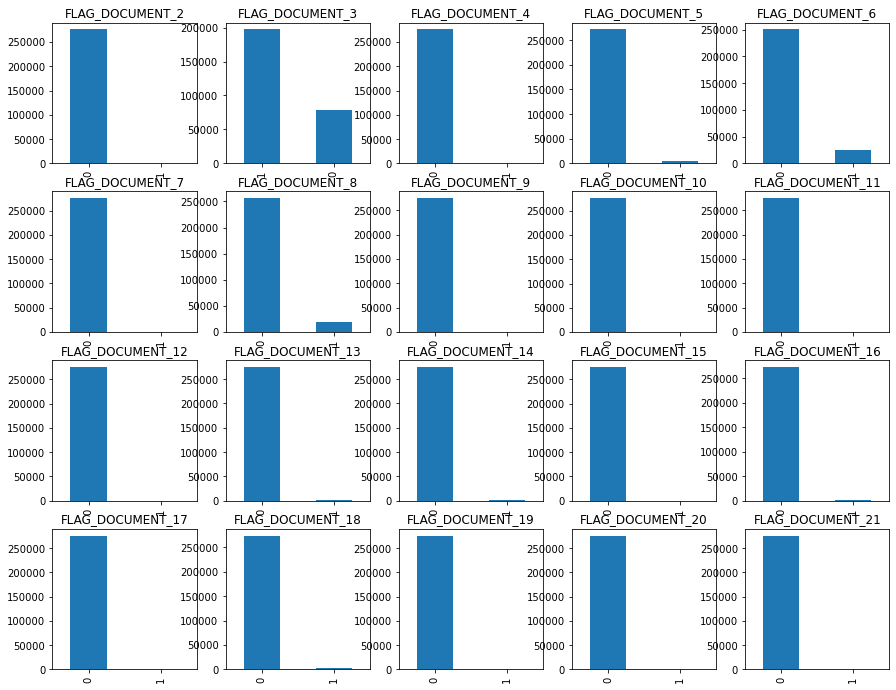

In [40]:
k=0
plt.figure(figsize=(15,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = 'FLAG_DOCUMENT_'+str(i)
    app_df[col_name].value_counts().plot(kind='bar');
    plt.title(col_name)

In [41]:
# Delete all teh FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
app_df.drop('FLAG_DOCUMENT_2',axis=1,inplace=True)
for i in range(4,22):
    col = 'FLAG_DOCUMENT_'+str(i)
    app_df.drop(col,axis=1,inplace=True)

In [42]:
# Define function for categorizing AGE_GROUP (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [43]:
#Creating new column AGE_GROUP
app_df['AGE_GROUP'] = app_df['AGE'].apply(age_group)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,0.262949,0.139376,1,0.0,26,2,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,0.622246,0.510853,1,0.0,46,4,Mid Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,0.555912,0.729567,0,0.0,53,1,Mid Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,0.650442,0.510853,1,0.0,53,9,Mid Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,Religion,0.322738,0.510853,0,0.0,55,9,Mid Age


In [44]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [45]:
#Creating new column CREDIT_GROUP
app_df['CREDIT_GROUP'] = app_df['AMT_CREDIT'].apply(credit_group)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Business Entity Type 3,0.262949,0.139376,1,0.0,26,2,Young,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,School,0.622246,0.510853,1,0.0,46,4,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Government,0.555912,0.729567,0,0.0,53,1,Mid Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,Business Entity Type 3,0.650442,0.510853,1,0.0,53,9,Mid Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,Religion,0.322738,0.510853,0,0.0,55,9,Mid Age,Medium


In [46]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [47]:
#Creating new column INCOME_GROUP
app_df['INCOME_GROUP'] = app_df['AMT_INCOME_TOTAL'].apply(income_group)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.262949,0.139376,1,0.0,26,2,Young,Low,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.622246,0.510853,1,0.0,46,4,Mid Age,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,0.555912,0.729567,0,0.0,53,1,Mid Age,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,0.650442,0.510853,1,0.0,53,9,Mid Age,Low,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,0.322738,0.510853,0,0.0,55,9,Mid Age,Medium,Medium


In [48]:
# Client with payment difficulties (Target=1)
df_current_target_1 = app_df[app_df['TARGET'] == 1]
df_current_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.262949,0.139376,1,0.0,26,2,Young,Low,High
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,Business Entity Type 3,0.548477,0.190706,1,2.0,52,8,Mid Age,High,Medium
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Business Entity Type 3,0.306841,0.320163,1,0.0,48,4,Mid Age,High,High
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,Self-employed,0.674203,0.399676,1,0.0,37,10,Young,Low,Medium
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,XNA,0.023952,0.720944,0,0.0,68,1000,Senior,Low,Low


In [49]:
df_current_target_0 = app_df[app_df['TARGET'] == 0]
df_current_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.622246,0.510853,1,0.0,46,4,Mid Age,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,0.555912,0.729567,0,0.0,53,1,Mid Age,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,0.650442,0.510853,1,0.0,53,9,Mid Age,Low,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,0.322738,0.510853,0,0.0,55,9,Mid Age,Medium,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Other,0.354225,0.621226,1,1.0,47,5,Mid Age,Low,Low


In [50]:
df_current_target_0.shape

(252872, 32)

In [51]:
df_current_target_1.shape

(23112, 32)

### Imbalance Ratio

In [52]:
print("Percentage of defaulters: ", df_current_target_1.shape[0]*100/(df_current_target_1.shape[0]+df_current_target_0.shape[0]))

Percentage of defaulters:  8.374398515855992


So the ratio of defaulters to non-defaulters is approximately 8:92 = 2:23 .

### Top 10 Correlation for dafaulters

In [53]:
defaulter_corr = df_current_target_0.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()

In [54]:
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                   SK_ID_CURR                    1.000000
AMT_CREDIT                   AMT_GOODS_PRICE               0.982242
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950873
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.876577
AMT_CREDIT                   AMT_ANNUITY                   0.762763
AMT_ANNUITY                  AMT_GOODS_PRICE               0.762542
YEARS_EMPLOYED               AGE                           0.638387
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.453306
AMT_ANNUITY                  AMT_INCOME_TOTAL              0.404490
AMT_GOODS_PRICE              AMT_INCOME_TOTAL              0.328678
AMT_CREDIT                   AMT_INCOME_TOTAL              0.325565
dtype: float64

### Top 10 Correlations for Non-defaulter

In [55]:
nondefaulter_corr = df_current_target_1.corr()
round(nondefaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack()

In [56]:
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                  SK_ID_CURR                     1.000000
AMT_CREDIT                  AMT_GOODS_PRICE                0.978326
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.960096
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.884818
AMT_CREDIT                  AMT_ANNUITY                    0.743835
AMT_GOODS_PRICE             AMT_ANNUITY                    0.741417
YEARS_EMPLOYED              AGE                            0.591351
REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.494911
AMT_INCOME_TOTAL            AMT_ANNUITY                    0.379973
AMT_GOODS_PRICE             AMT_INCOME_TOTAL               0.300847
AMT_CREDIT                  AMT_INCOME_TOTAL               0.300536
dtype: float64

# Analysis

## (a) Univariate Analysis

[Text(0.5, 0, 'Gender')]

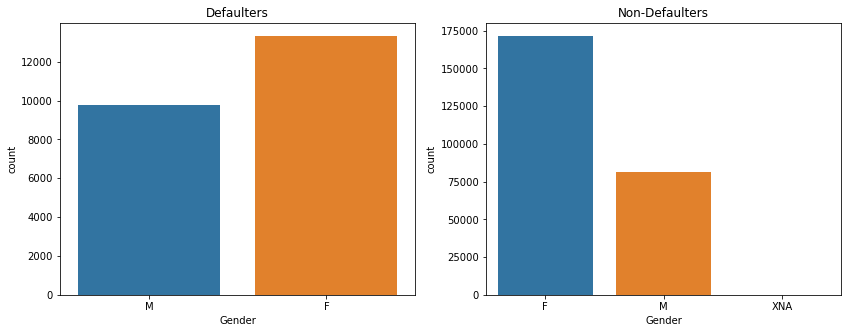

In [57]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

(i) Defaluters - We can see that females are slightly more in number of defaulters than male.*\
(ii) Non-defaluters - The same pattern continues for non-defaluters as well. The females are more in number here than male.

[Text(0.5, 0, 'Loan type')]

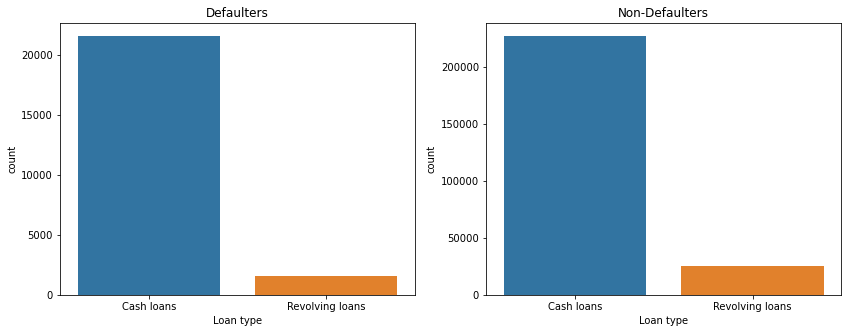

In [58]:
#on the basis of loan type
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')


We see in both the cases that Revolving loans are very less in number compared to Cash loans

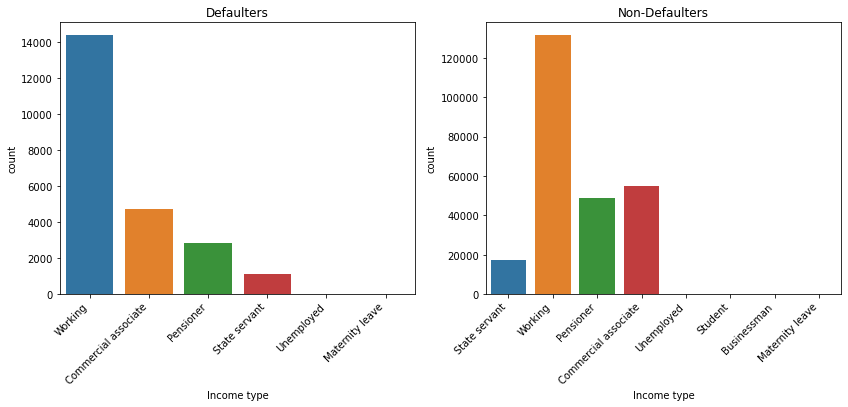

In [59]:
#on the basis of income type
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

(i) Defaulters - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.\
(ii) Non-defaulters - Similarly here also working people are more in number who are not defaulted.

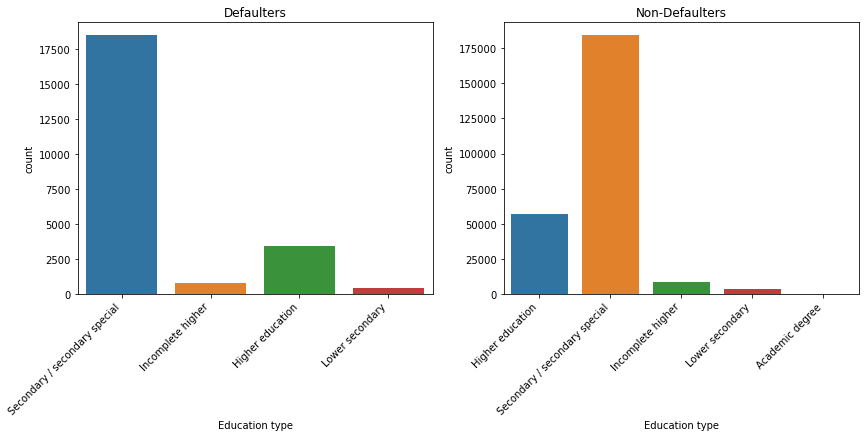

In [60]:
#on the basis of education type
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

(i) Defaulters - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of eduacted poeple.\
(ii) Non defaulters - Here also Secondary/Secondary sepcial are more in numbers.

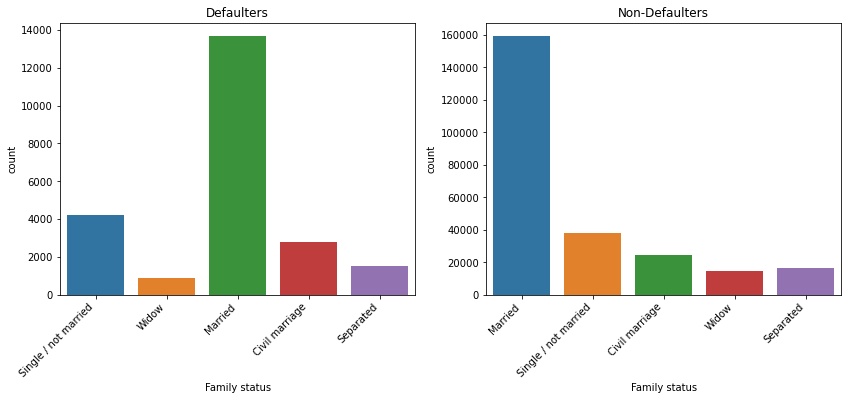

In [61]:
#on the basis of family status
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

For both the customers (defaulters and non-defaulters) married people are more in number comapred with single, separated, widow etc.

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

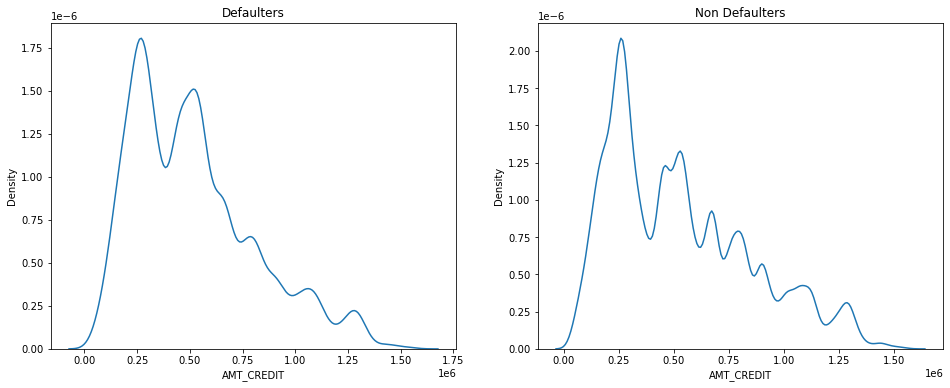

In [62]:
#on the basis of credit amount of loan
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_CREDIT'],hist=False)

(i) Defaulters - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.\
(ii) Non defaulters - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

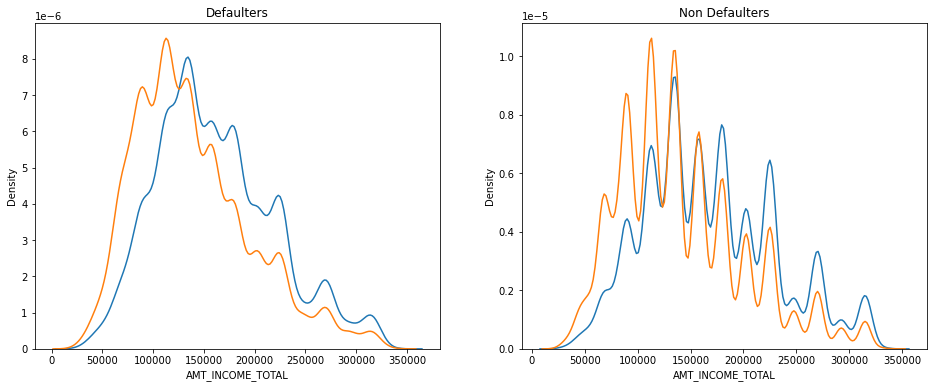

In [63]:
#on the basis of the gender and their total income
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = df_current_target_1[df_current_target_1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    
plt.subplot(1,2,2) 
plt.title('Non Defaulters')
for i in gender:
    subset = df_current_target_0[df_current_target_0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)

(i) Defaulters - We can notice by looking at the pattern that for being a defaulter both the genders (male and female) are almost equal in all income levels. The spike of being defaulters is from 50000 to 200000.\
(ii) Non defaulters - Here we see an interesting pattern. Females are more non defaulter on the lower income level but lesser non defaluter in higher income level. The spike is more for both the genders from 75000 to 150000.

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

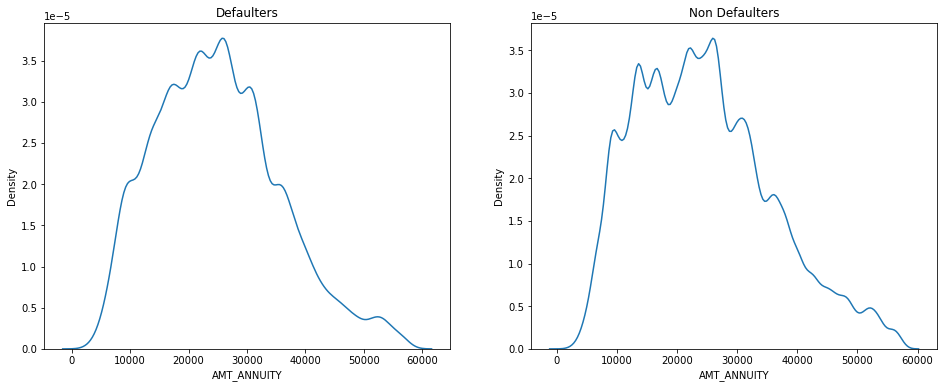

In [64]:
#on the basis of loan annuity

plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_ANNUITY'],hist=False)

We can notice from the above distribution plot that in both the cases the loan annuity is concentrated more from 10000 to 40000.

## Segmented Univariate Analysis

In [65]:
# Taking the percentage of each age group who was defaulted.
# Divide each defaulted age group count by total count of that age group
young_1 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Young') & (app_df['TARGET'] == 1)])/len(app_df[app_df['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Mid Age') & (app_df['TARGET'] == 1)])/len(app_df[app_df['AGE_GROUP'] == 'Mid Age']),2)
senior_1 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Senior') & (app_df['TARGET'] == 1)])/len(app_df[app_df['AGE_GROUP'] == 'Senior']),2)


In [66]:
agegroup_default = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_1, midage_1, senior_1]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

,AGE_GROUP,Percentage
0,Young,10.79
1,Mid Age,7.37
2,Senior,5.08


In [67]:
# Taking the percentage of each age group who was not defaulted.
# Divide each defaulted age group count by total count of that age group
young_0 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Young') & (app_df['TARGET'] == 0)])/len(app_df[app_df['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Mid Age') & (app_df['TARGET'] == 0)])/len(app_df[app_df['AGE_GROUP'] == 'Mid Age']),2)
senior_0 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Senior') & (app_df['TARGET'] == 0)])/len(app_df[app_df['AGE_GROUP'] == 'Senior']),2)

In [68]:
agegroup_nondefault = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_0, midage_0, senior_0]} 
df_agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
df_agegroup_nondefault

,AGE_GROUP,Percentage
0,Young,89.21
1,Mid Age,92.63
2,Senior,94.92


Text(0.5, 1.0, 'Non-Defaulters')

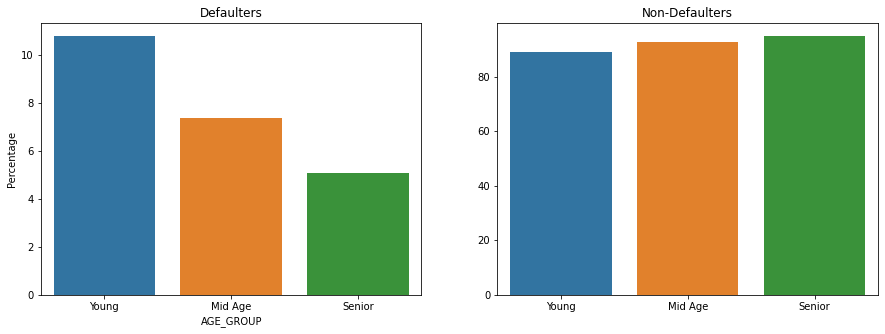

In [69]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_default)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup_nondefault)
plt.title('Non-Defaulters')

(i) Defaulters - We see that Young people are more likely to default than other two age groups. Whereas, Senior citizens are less likely to default than others.\
(ii) Non defaulters - There is not much difference in the likelihood for non defaulters in the age groups.

Text(0.5, 1.0, 'Non-Defaulters')

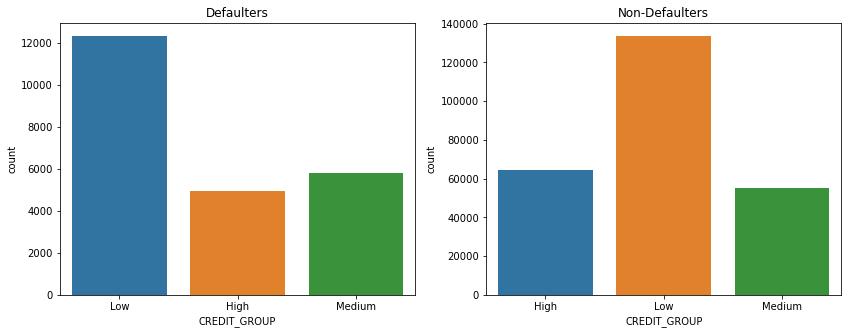

In [70]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

(i) Defaulters - Surprisingly low credited amount groups are more defaulters.\
(ii) Non defaulters - As expected low credit amount groups are more in number, who were not defaulted.

Text(0.5, 1.0, 'Non-Defaulters')

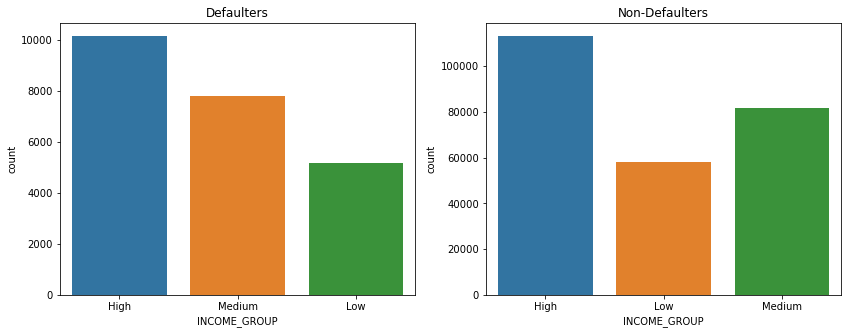

In [71]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

(i) Defaulters - Surprisingly the High income group is more in number to be defaulted, then Medium and then Low.\
(ii) Non defaulters - Here as expected the count of non defaulters more in High income group and less in low income group.

## Bivariate Analysis

In [72]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','REGION_RATING_CLIENT']

In [73]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_current_target_1[corr_cols]
df_corr_target_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
0,202500.0,406597.5,24700.5,351000.0,26,2
26,112500.0,979992.0,27076.5,702000.0,52,3
40,202500.0,1193580.0,35028.0,855000.0,48,2
42,135000.0,288873.0,16258.5,238500.0,37,3
81,81000.0,252000.0,14593.5,252000.0,68,2


In [74]:
# Corelation matrix
df_corr_target_1.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.300536,0.379973,0.300847,-0.017733,-0.141908
AMT_CREDIT,0.300536,1.000000,0.743835,0.978326,0.134223,-0.037249
AMT_ANNUITY,0.379973,0.743835,1.000000,0.741417,0.002448,-0.043304
AMT_GOODS_PRICE,0.300847,0.978326,0.741417,1.000000,0.135488,-0.045769
AGE,-0.017733,0.134223,0.002448,0.135488,1.000000,-0.035831
REGION_RATING_CLIENT,-0.141908,-0.037249,-0.043304,-0.045769,-0.035831,1.000000


<AxesSubplot:>

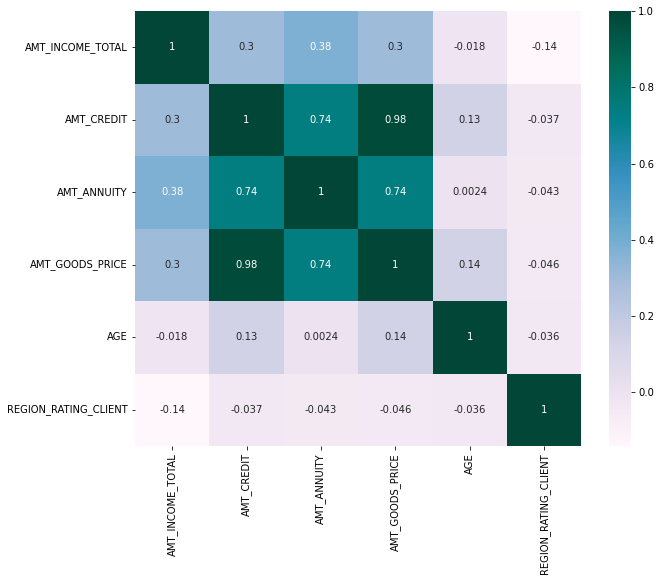

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(),cmap="PuBuGn",annot=True)

### Highly corelate columns for defaulters

(i) AMT_CREDIT and AMT_ANNUITY (0.74)\
(ii) AMT_CREDIT and AMT_GOODS_PRICE (0.98)\
(iii) AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

In [76]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_current_target_0[corr_cols]
df_corr_target_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
1,270000.0,1293502.5,35698.5,1129500.0,46,1
2,67500.0,135000.0,6750.0,135000.0,53,2
3,135000.0,312682.5,29686.5,297000.0,53,2
4,121500.0,513000.0,21865.5,513000.0,55,2
5,99000.0,490495.5,27517.5,454500.0,47,2


In [77]:
# Corelation matrix
df_corr_target_0.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.325565,0.404490,0.328678,-0.100558,-0.173454
AMT_CREDIT,0.325565,1.000000,0.762763,0.982242,0.047800,-0.047224
AMT_ANNUITY,0.404490,0.762763,1.000000,0.762542,-0.022906,-0.077642
AMT_GOODS_PRICE,0.328678,0.982242,0.762542,1.000000,0.046114,-0.049078
AGE,-0.100558,0.047800,-0.022906,0.046114,1.000000,-0.004730
REGION_RATING_CLIENT,-0.173454,-0.047224,-0.077642,-0.049078,-0.004730,1.000000


<AxesSubplot:>

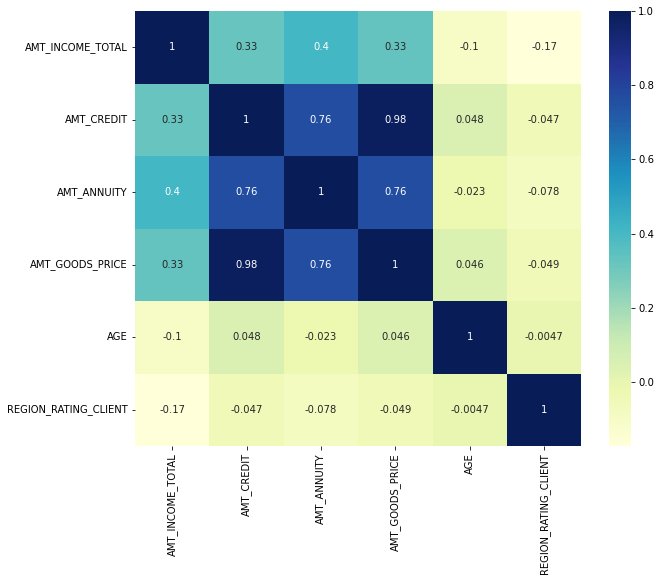

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(),cmap="YlGnBu",annot=True)

### Highly corelate columns for non defaulters

* AMT_CREDIT and AMT_ANNUITY (0.76)
* AMT_CREDIT and AMT_GOODS_PRICE (0.98)
* AMT_ANNUITY and AMT_GOODS_PRICE (0.76)

Text(0.5, 1.0, 'Non Defaulters')

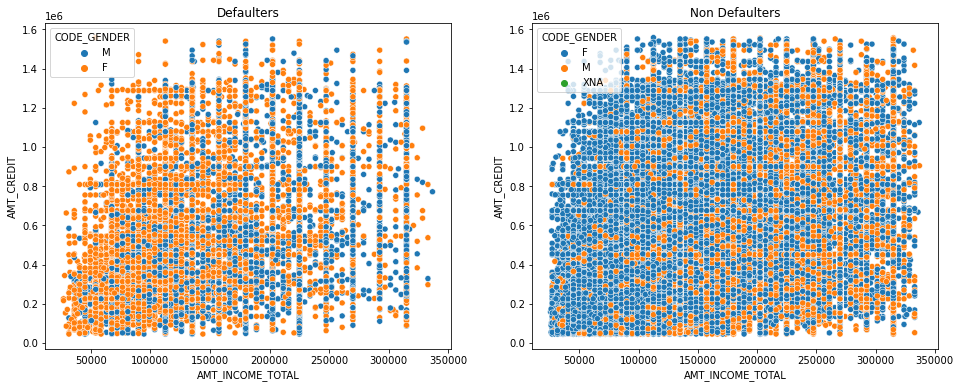

In [79]:
#Credit amount of the loan on the basis of client income for both male and female
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=df_current_target_0)
plt.title('Non Defaulters')

* Defaulters - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.\
* Non defaulters - We can hardly figure out any pattern out of this.

Text(0.5, 1.0, 'Non Defaulters')

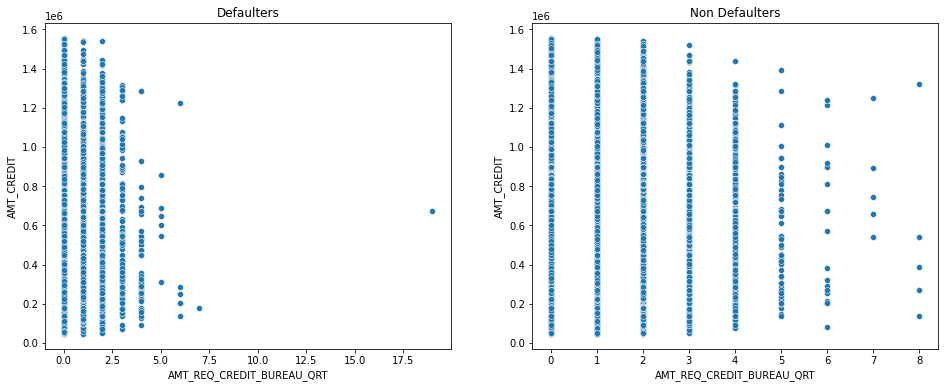

In [80]:
#Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=df_current_target_0)
plt.title('Non Defaulters')

In [81]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP']

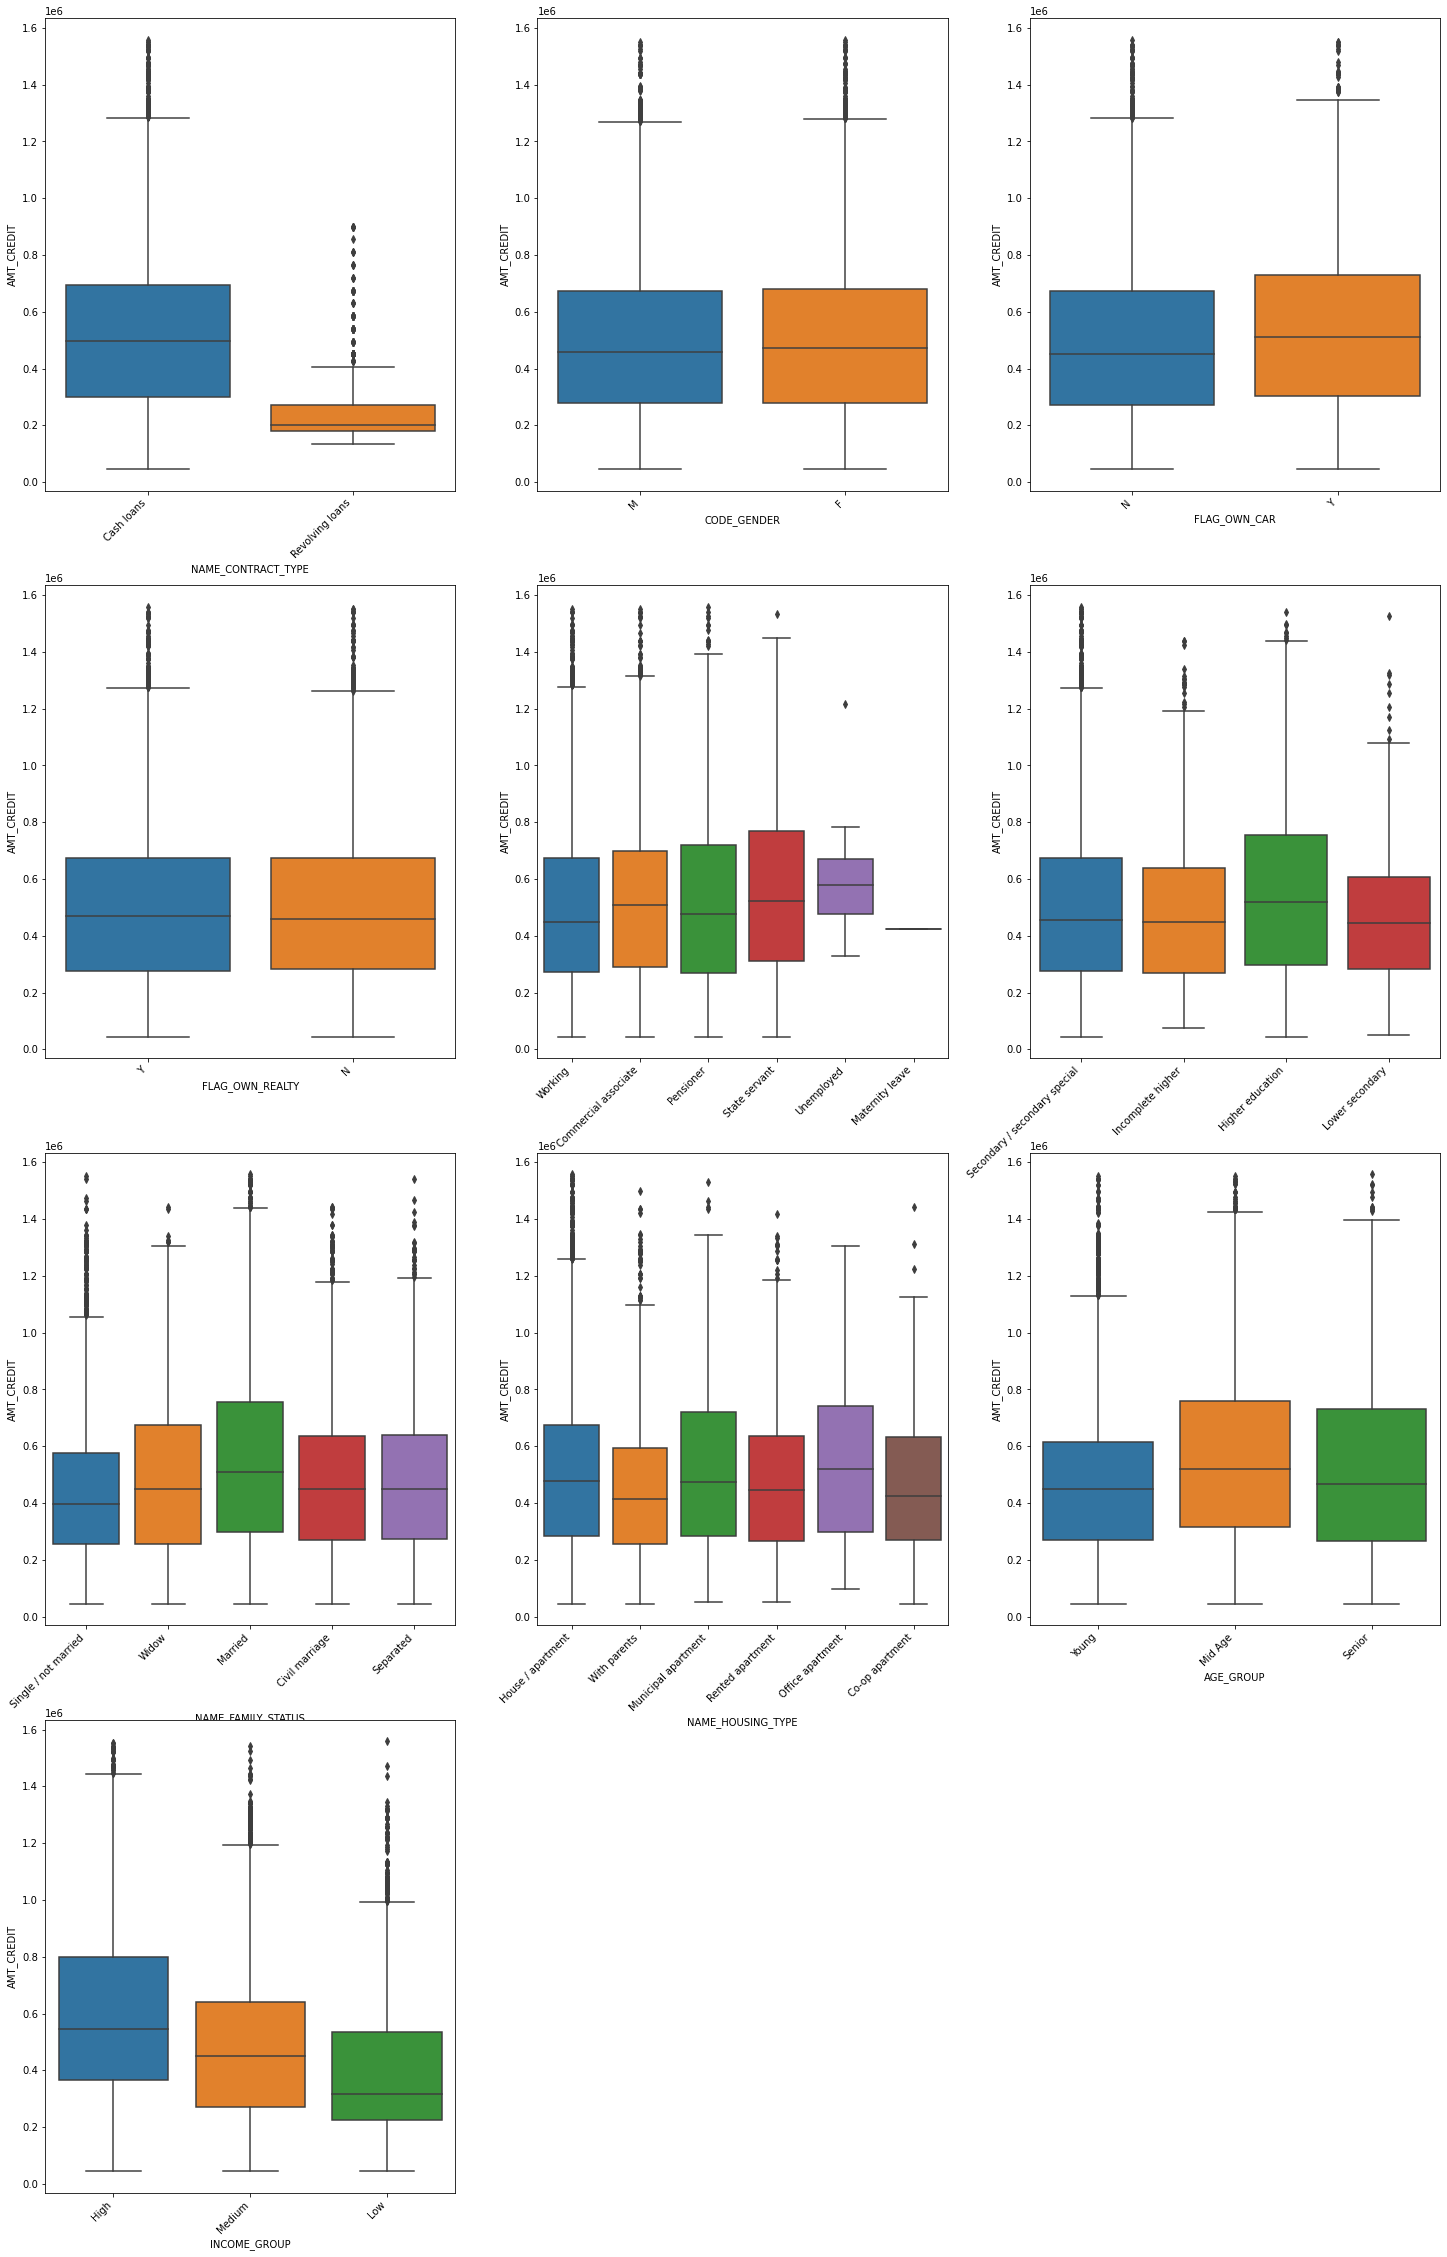

In [82]:
#defaulters
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


* Credit amount of the loans are very low for Revolving loans
* There is no credit amount differnce between genders, client owning cars or realty.
* The Young age group got less amount of loan credited cmpared to mid age and senior citizen.
* Higher income group have more loan amount credited.
* Clients having higher external score have more loan amount.

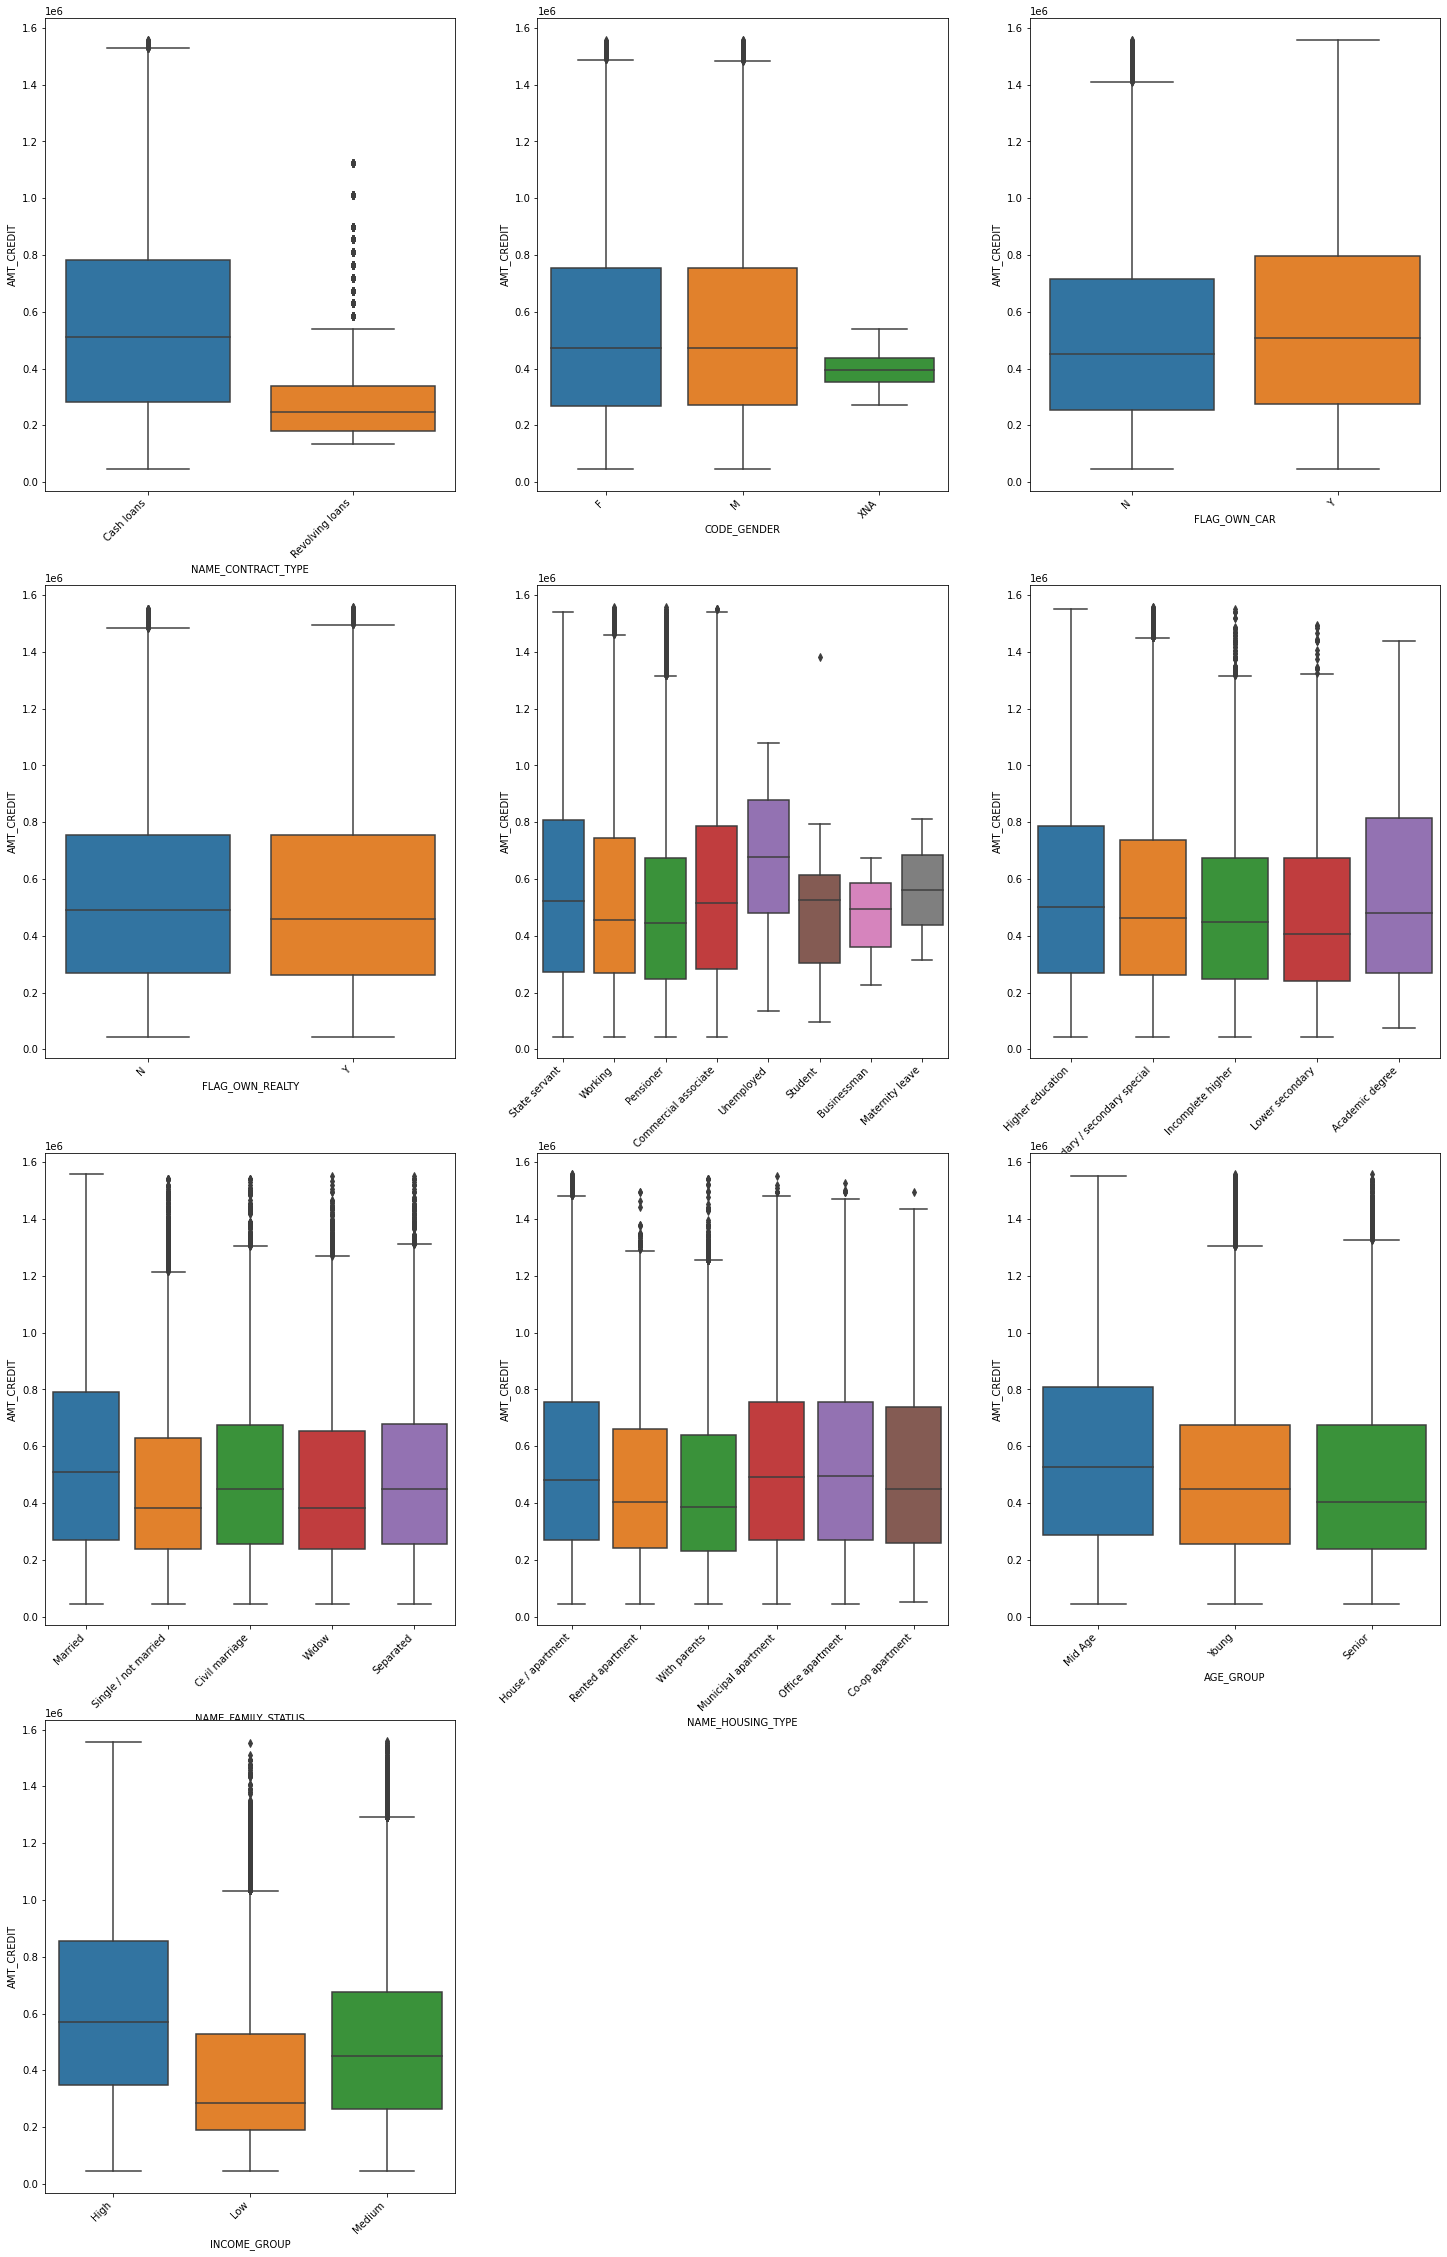

In [83]:
#non-defaulters
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

* Credit amount of the loans are very low for Revolving loans
* There is no credit amount differnce between genders, client owning cars or realty.
* The mid age group got more amount of loan credited cmpared to young and senior citizen.
* Higher income group have more loan amount credited and lower the lowest.
* Clients having higher external score have more loan amount.
* Surprisingly the unemployed people have spike in credit amount of loan
* The Married people have more loan amount credited.

### Income group and Gender

Text(0, 0.5, 'Defaulters')

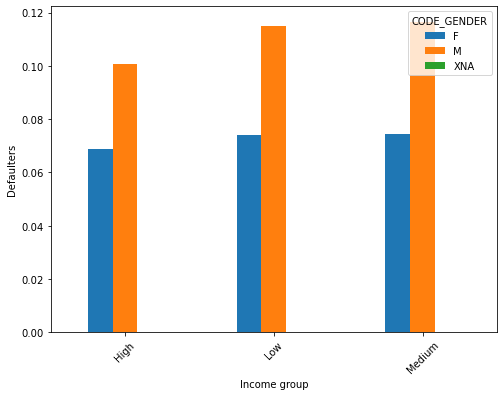

In [84]:
app_df.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')

We can see that Males are more likely defaulted than Females accross all income groups.

### Education and gender

Text(0, 0.5, 'Defaulters')

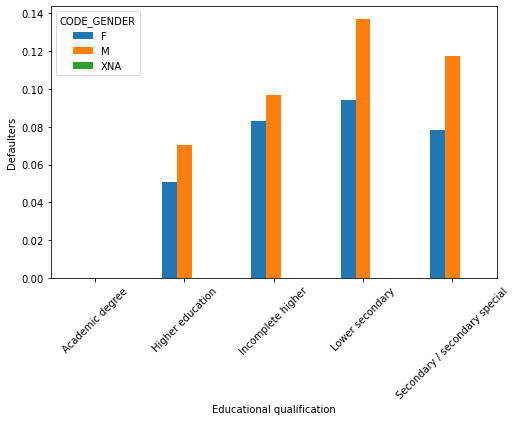

In [85]:
app_df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

* Lower secondary educated clients are more defaulted followed by Secondary and Incomplete higher educated clients.
* The Higher educated people are less defaulted.
* Accross all educated level Females are less defaulted than male.

### Credit amount group and Income group

Text(0, 0.5, 'Defaulters')

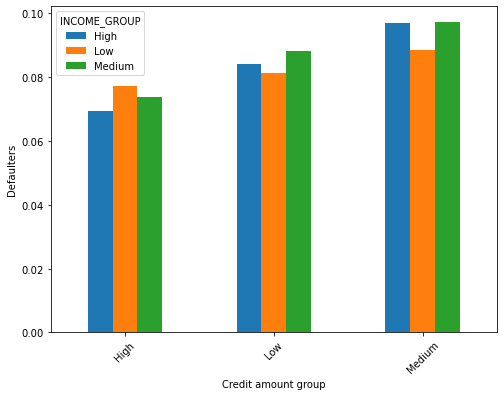

In [86]:
app_df.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

* Medium credit amount group are highly defaulted in all income groups.
* High credit amount groups are less likely to default in all income groups.

### Credit amount group and Age group

Text(0, 0.5, 'Defaulters')

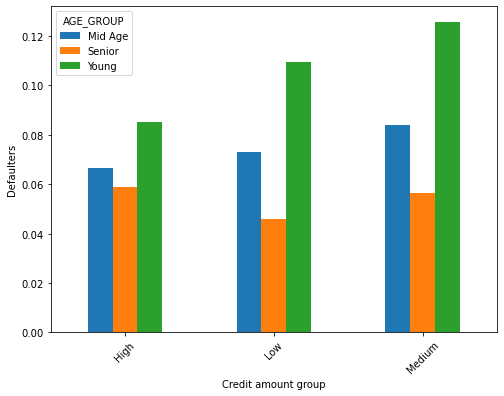

In [87]:
app_df.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

* Young clients are more defaulted than Mid age and senior.
* Young low income people are more defaulted.
* For Mid age and senior people the default rate is almost same in all income group.

### Profession and Gender

Text(0, 0.5, 'Defaulters')

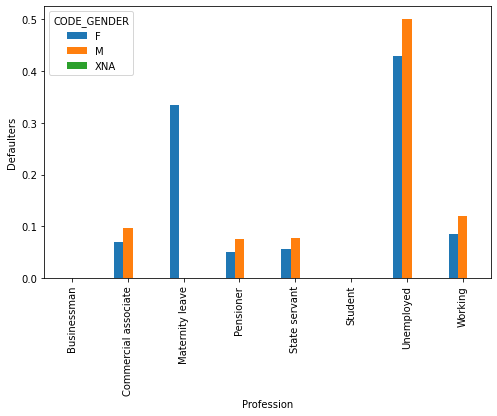

In [88]:
app_df.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

* No surprise the unemployed clients are more defaulted.
* Clients with maternity leave are expected to be defaulted more.
* The default rate is lesser in all other professions.
* Males are more defaulted with their respective professions compared to females.

### Family status and Gender

Text(0, 0.5, 'Defaulters')

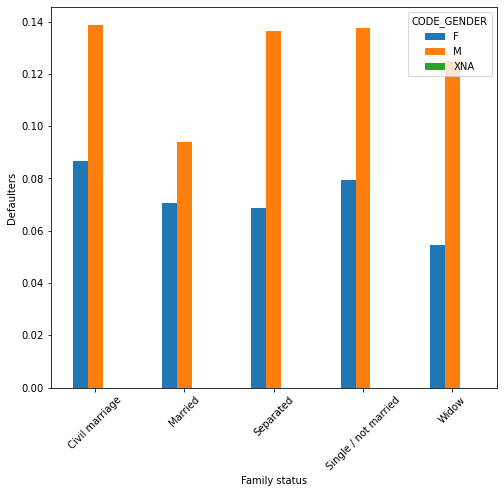

In [89]:
app_df.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')


Across all family status the Male clients are more defaulted than Female.

### Family status and Age group

Text(0, 0.5, 'Defaulters')

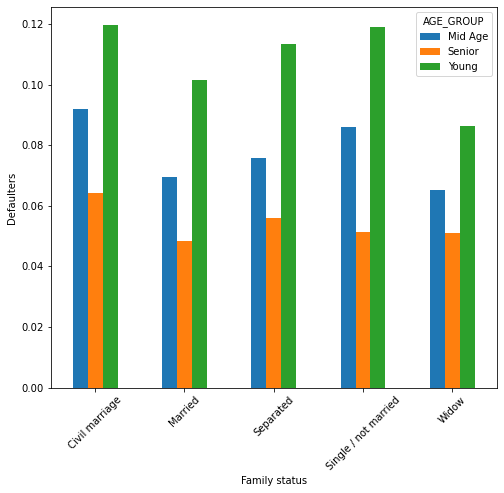

In [90]:
app_df.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

Across all family status the Young clients are more defaulted and Senior citizen are less.